In [8]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Checking My Dataset

In [9]:
print('x_train: '+str(x_train.shape))
print('y_train: '+str(y_train.shape))
print('x_test: '+str(x_test.shape))
print('y_test: '+str(y_test.shape))

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


[4]


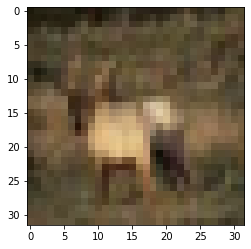

In [10]:
plt.imshow(x_train[3])
print(y_train[3])

Preprocessing

with Resize Images

In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

new_train=tf.image.resize(x_train,(16,16))
new_train=np.array(new_train)
new_test=tf.image.resize(x_test,(16,16))
new_test=np.array(new_test)

new_train=new_train.reshape(-1,16*16*3).astype(np.float32)/255
new_test=new_test.reshape(-1,16*16*3).astype(np.float32)/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
def shuffling(x,y):
  index=list(range(len(x)))
  np.random.shuffle(index)
  x_new=x[index]
  y_new=y[index]
  return x_new , y_new
new_train,y_train=shuffling(new_train,y_train)
new_train_tuning=new_train[:int(len(new_train)/3)]
y_train_tuning=y_train[:int(len(y_train)/3)]

without Resize Images

In [7]:
from tensorflow.keras.utils import to_categorical

x_train=x_train.reshape(-1,32*32*3).astype(np.float32)/255
x_test=x_test.reshape(-1,32*32*3).astype(np.float32)/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
def shuffling(x,y):
  index=list(range(len(x)))
  np.random.shuffle(index)
  x_new=x[index]
  y_new=y[index]
  return x_new , y_new
x_train,y_train=shuffling(x_train,y_train)
x_train_tuning=x_train[:int(len(x_train)/3)]
y_train_tuning=y_train[:int(len(y_train)/3)]



Without K_Fold Cross Validation

In [12]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
from tensorflow.keras import metrics

model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=16*16*3))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
val=int(0.1*len(new_train))
history=model.fit(new_train[val:], y_train[val:],batch_size=25, epochs=40,validation_data=(new_train[:val],y_train[:val]))

Epoch 1/40
1800/1800 [==============================] - 5s 3ms/step - loss: 1.9450 - acc: 0.2911 - val_loss: 1.7482 - val_acc: 0.3724
Epoch 2/40
1800/1800 [==============================] - 4s 2ms/step - loss: 1.7422 - acc: 0.3755 - val_loss: 1.6453 - val_acc: 0.4264
Epoch 3/40
1800/1800 [==============================] - 4s 2ms/step - loss: 1.6649 - acc: 0.4043 - val_loss: 1.5979 - val_acc: 0.4286
Epoch 4/40
1800/1800 [==============================] - 5s 3ms/step - loss: 1.6056 - acc: 0.4294 - val_loss: 1.5336 - val_acc: 0.4612
Epoch 5/40
1800/1800 [==============================] - 5s 3ms/step - loss: 1.5600 - acc: 0.4433 - val_loss: 1.5058 - val_acc: 0.4698
Epoch 6/40
1800/1800 [==============================] - 4s 2ms/step - loss: 1.5235 - acc: 0.4574 - val_loss: 1.4708 - val_acc: 0.4762
Epoch 7/40
1800/1800 [==============================] - 4s 2ms/step - loss: 1.4928 - acc: 0.4677 - val_loss: 1.4586 - val_acc: 0.4830
Epoch 8/40
1800/1800 [==============================] - 4s 2ms

In [13]:
model.evaluate(new_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2636 - acc: 0.5637


[1.2636357545852661, 0.5637000203132629]

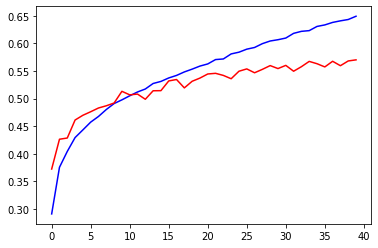

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'],'b-')
plt.plot(history.history['val_acc'],'r-')

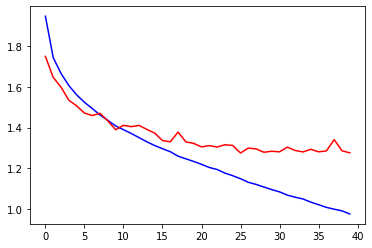

In [15]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r-')

Confusion Matrics

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

y_pred=to_categorical(np.argmax(model.predict(new_test),axis=1))


In [31]:
import pandas as pd
CM=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))
CMDF=pd.DataFrame(CM,index=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],
                  columns=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
CMDF.index.name='True'
CMDF.columns.name='Predicted'
CMDF

Predicted,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
True,,,,,,,,,,
airplane,571,46,97,32,42,14,19,24,108,47
automobile,20,721,17,17,12,10,17,16,45,125
bird,46,24,449,101,143,66,84,60,13,14
cat,17,19,79,427,58,189,96,61,25,29
deer,33,10,139,77,487,51,88,79,23,13
dog,12,8,75,251,64,453,48,58,16,15
frog,4,17,75,98,95,40,632,16,10,13
horse,23,17,38,71,76,69,19,643,7,37
ship,85,79,25,27,27,12,10,14,659,62


Accuracy:

In [43]:
for i in range(len(CM)):
  print(CMDF.index[i]+' : '+str(CM[i,i]/np.sum(CM)*100))


airplane : 5.71
automobile : 7.21
bird : 4.49
cat : 4.2700000000000005
deer : 4.87
dog : 4.53
frog : 6.32
horse : 6.43
ship : 6.59
truck : 5.949999999999999


Precision:

In [46]:
for i in range(len(CM)):
  print(CMDF.index[i]+' : '+str(CM[i,i]/np.sum(CM[:,i])*100))

airplane : 67.97619047619048
automobile : 64.4325290437891
bird : 44.32379072063179
cat : 37.55496921723835
deer : 47.93307086614173
dog : 49.07908992416034
frog : 61.359223300970875
horse : 63.28740157480315
ship : 68.93305439330544
truck : 62.63157894736842


Recall:

In [47]:
for i in range(len(CM)):
  print(CMDF.index[i]+' : '+str(CM[i,i]/np.sum(CM[i])*100))

airplane : 57.099999999999994
automobile : 72.1
bird : 44.9
cat : 42.699999999999996
deer : 48.699999999999996
dog : 45.300000000000004
frog : 63.2
horse : 64.3
ship : 65.9
truck : 59.5


F1Score:

In [54]:
def harmonic_mean(a,b):
  return 2/((1/a)+(1/b))
for i in range(len(CM)):
  print(CMDF.index[i]+' : '+str(harmonic_mean((CM[i,i]/np.sum(CM[i])*100),(CM[i,i]/np.sum(CM[:,i])*100))))

airplane : 62.06521739130435
automobile : 68.0509674374705
bird : 44.610034773969204
cat : 39.96256434253627
deer : 48.313492063492056
dog : 47.113884555382214
frog : 62.266009852216754
horse : 63.78968253968253
ship : 67.38241308793455
truck : 61.02564102564102


K_Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential

kf=KFold(n_splits=5,shuffle=True)
kf.get_n_splits(x_train_tuning,y_train_tuning)
def training_model(X,y,batch_size,epochs):
    train_score=[]
    test_score=[]
    for train,test in kf.split(X,y):
        model = Sequential()
        model.add(Dense(500, activation='relu', input_dim=32*32*3))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
        history=model.fit(X[train],y[train],batch_size=batch_size,epochs=epochs,validation_data=(X[test],y[test]))
        train_score.append(history.history['acc'][-1])
        test_score.append(history.history['val_acc'][-1])
    train_mean_score=np.mean(np.array(train_score))
    test_mean_score=np.mean(np.array(test_score))
    return train_mean_score,test_mean_score,model

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


acc,valacc,model=training_model(x_train_tuning,y_train_tuning,batch_size=15,epochs=20)

Epoch 1/20
534/534 [==============================] - 2s 3ms/step - loss: 2.0387 - acc: 0.2632 - val_loss: 1.9610 - val_acc: 0.3140
Epoch 2/20
534/534 [==============================] - 2s 3ms/step - loss: 1.8864 - acc: 0.3282 - val_loss: 1.9034 - val_acc: 0.3205
Epoch 3/20
534/534 [==============================] - 2s 3ms/step - loss: 1.8159 - acc: 0.3548 - val_loss: 1.8254 - val_acc: 0.3655
Epoch 4/20
534/534 [==============================] - 1s 3ms/step - loss: 1.7496 - acc: 0.3868 - val_loss: 1.7699 - val_acc: 0.3730
Epoch 5/20
534/534 [==============================] - 2s 3ms/step - loss: 1.7016 - acc: 0.4016 - val_loss: 1.7587 - val_acc: 0.3800
Epoch 6/20
534/534 [==============================] - 2s 3ms/step - loss: 1.6557 - acc: 0.4211 - val_loss: 1.7469 - val_acc: 0.3890
Epoch 7/20
534/534 [==============================] - 2s 3ms/step - loss: 1.6312 - acc: 0.4336 - val_loss: 1.7651 - val_acc: 0.3695
Epoch 8/20
534/534 [==============================] - 2s 3ms/step - loss: 1.

In [ ]:
print(acc)
print(valacc)

0.5523750185966492
0.4228000044822693


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6105 - acc: 0.4349


[1.6104811429977417, 0.4348999857902527]